In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n

In [2]:
pip install word2number

Note: you may need to restart the kernel to use updated packages.


In [3]:
data=pd.read_csv('D:\Machine_Learning\Machine_Learning\multivariable regression\hiring.csv')
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
data.experience=data.experience.fillna('zero')
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
data.experience=data.experience.apply(w2n.word_to_num)
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [6]:
import math
test_score_median=math.floor(data['test_score(out of 10)'].mean())
test_score_median

7

In [7]:
data['test_score(out of 10)']=data['test_score(out of 10)'].fillna(test_score_median)
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [8]:
reg=linear_model.LinearRegression()
reg.fit(data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], data['salary($)'])

LinearRegression()

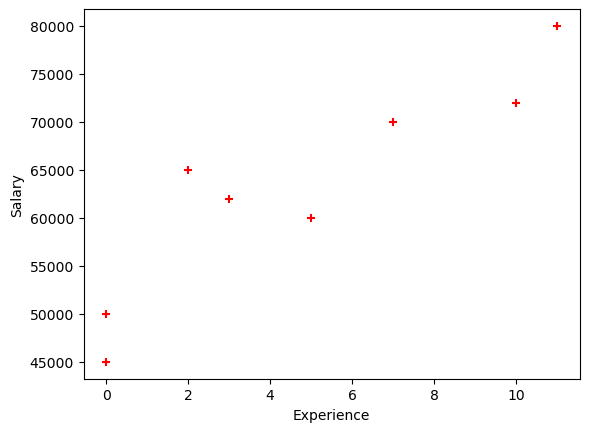

In [9]:
%matplotlib inline
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(data.experience, data['salary($)'], color='red', marker='+')

In [10]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [11]:
reg.intercept_

14992.651446693126

In [12]:
reg.predict([[2,9,6]])

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

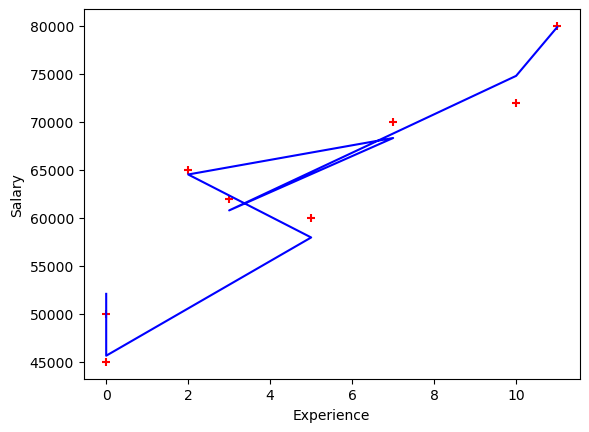

In [13]:
%matplotlib inline
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(data.experience, data['salary($)'], color='red', marker='+')
plt.plot(data.experience, reg.predict(data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]), color='blue')

In [14]:
reg.predict([[3,9,9]])

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([63078.58348536])

In [15]:
from sklearn.linear_model import LogisticRegression
lo_re=LogisticRegression()
lo_re.fit(data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], data['salary($)'])

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
lo_re.predict([[3,9,9]])

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([65000], dtype=int64)